<Figure size 432x288 with 0 Axes>

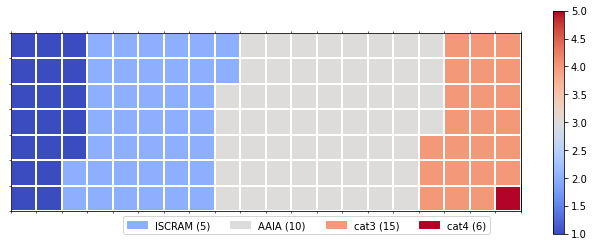

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Let's make a default data frame with catagories and values.
df = pd.DataFrame({ 'catagories': ['ISCRAM', 'AAIA', 'cat3', 'cat4'], 
                    'values': [5, 10, 15, 6] })
# Now, we define a desired height and width.
waffle_plot_width = 20
waffle_plot_height = 7

classes = df['catagories']
values = df['values']

def waffle_plot(classes, values, height, width, colormap):

    # Compute the portion of the total assigned to each class.
    class_portion = [float(v)/sum(values) for v in values]

    # Compute the number of tiles for each catagories.
    total_tiles = width * height
    tiles_per_class = [round(p*total_tiles) for p in class_portion]

    # Make a dummy matrix for use in plotting.
    plot_matrix = np.zeros((height, width))

    # Popoulate the dummy matrix with integer values.
    class_index = 0
    tile_index = 0

    # Iterate over each tile.
    for col in range(waffle_plot_width):
        for row in range(height):
            tile_index += 1

            # If the number of tiles populated is sufficient for this class...
            if tile_index > sum(tiles_per_class[0:class_index]):

                # ...increment to the next class.
                class_index += 1       

            # Set the class value to an integer, which increases with class.
            plot_matrix[row, col] = class_index

    # Create a new figure.
    fig = plt.figure()

    # Using matshow solves your "non-square" problem. 
    plt.matshow(plot_matrix, cmap=colormap)
    plt.colorbar()

    # Get the axis.
    ax = plt.gca()

    # Minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True);
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True);

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    # Manually constructing a legend solves your "catagorical" problem.
    legend_handles = []
    for i, c in enumerate(classes):
        lable_str = c + " (" + str(values[i]) + ")"
        color_val = colormap(float(i+1)/len(classes))
        legend_handles.append(mpatches.Patch(color=color_val, label=lable_str))

    # Add the legend. Still a bit of work to do here, to perfect centering.
    plt.legend(handles=legend_handles, loc=1, ncol=len(classes),
               bbox_to_anchor=(0., -0.1, 0.95, .10))

    plt.xticks([])
    plt.yticks([])

# Call the plotting function.
waffle_plot(classes, values, waffle_plot_height, waffle_plot_width,
            plt.cm.coolwarm)